# ex5: Regularización y métodos iterativos

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from skimage.restoration import denoise_tv_chambolle
from skimage.util import random_noise

In [2]:
ASSETS_FOLDER_PATH = "./assets"
OUTPUT_FOLDER_PATH = "."

In [3]:
Path(OUTPUT_FOLDER_PATH).mkdir(parents=True, exist_ok=True)

Traemos las funciones de puntos anteriores:

In [4]:
def plot_images(img1, title1, img2, title2):
    fig = plt.figure(figsize=(6, 7))
    
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')
    plt.title(title1)

    fig.add_subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    plt.title(title2)

    plt.subplots_adjust(wspace=0.05, hspace=0)
    plt.show()

In [5]:
def mse(original, variation):
    return (original - variation).var()

## Total Variation Regularization

In [6]:
image_path = 'assets/lena_gray.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
imsize = image.shape

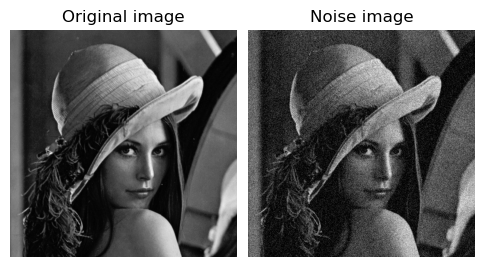

In [7]:
noise_image = random_noise(image, mode='gaussian', var=0.01)
plot_images(image, 'Original image', noise_image, 'Noise image')

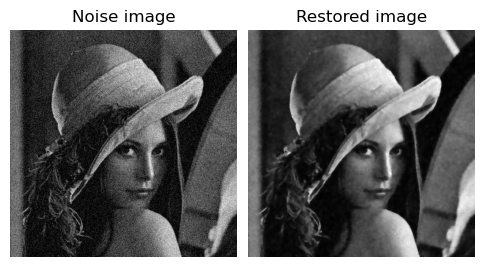

mse: 2487.330831350645


In [8]:
image_denoised = denoise_tv_chambolle(noise_image, max_num_iter=10000)

plot_images(noise_image, 'Noise image', image_denoised, 'Restored image')
print(f"mse: {mse(image, image_denoised)}")